In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
test=pd.read_excel("testarray_39_3_sample.xlsx", index_col=2)
final=pd.read_excel("finaltestarray_39_3_sample.xlsx", index_col=2)

In [3]:
final.drop(['sub', 'session', 'oe_jitter', 'rg_jitter', 'studyX', 'studyY'], axis=1, inplace=True)

In [4]:
test.drop(['sub', 'session', 'oe_jitter', 'rg_jitter'], axis=1, inplace=True)

In [5]:
all=final.join(test, lsuffix='_final', rsuffix='_test')

In [6]:
all.drop(['rg_side', 'rg_onset', 'rg_offset', 'rg_ans', 'rgX', 'rgY', 'rgrefresh', 'rg_corr', 'rg_dist', 'conf_refresh', 'finaltestorder', 'move_onset', 'move_offset', 'block_test', 'block_final', 'testorder'], axis=1, inplace=True)

In [7]:
all=all[all.click==1]

In [8]:
all.drop('click', axis=1, inplace=True)

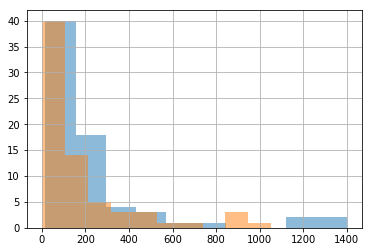

In [9]:
all['Fdistfromstudy'].hist(alpha=.5)
all['Fdistfromtest'].hist(alpha=.5)

In [10]:
all['s.180'].unique()

array([1, 0])

(-100, 1500)

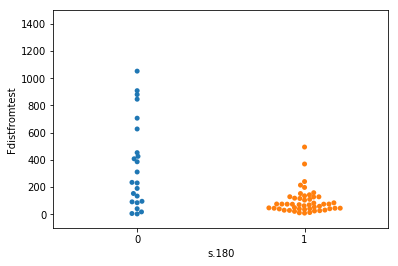

In [11]:
ax=plt.figure()
sns.swarmplot(x="s.180", y="Fdistfromtest", data=all)
plt.ylim(-100, 1500)

(-100, 1500)

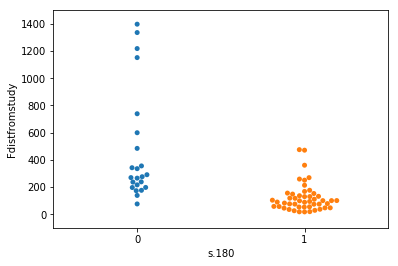

In [12]:
sns.swarmplot(x="s.180", y="Fdistfromstudy", data=all);
plt.ylim(-100, 1500)

In [13]:
all.columns

Index(['finaltestX', 'finaltestY', 'finalrecall_refresh', 'confX',
       'Fdistfromstudy', 'fs.180', 'Fdistfromtest', 'studyX', 'studyY',
       'testX', 'testY', 'recallrefresh', 'disterror', 's.180'],
      dtype='object')

In [14]:
corr_values=all.copy()
corr_values.drop(['finaltestX', 'finaltestY', 'studyX', 'studyY', 'testX', 'testY'], axis=1, inplace=True)

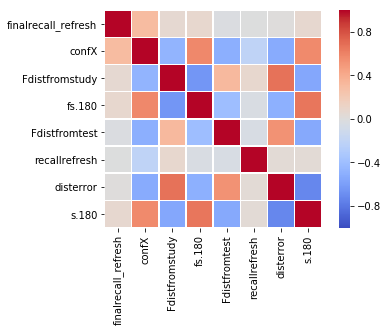

In [15]:
sns.heatmap(corr_values.corr(), vmin=-1, vmax=1, center=0, cmap='coolwarm',
            square=True, linewidths=.5)

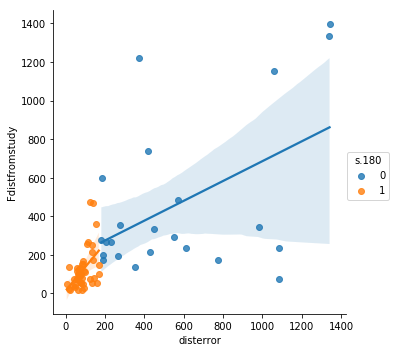

In [16]:
sns.lmplot(x="disterror", y="Fdistfromstudy", hue='s.180',
               truncate=True, size=5, data=all)

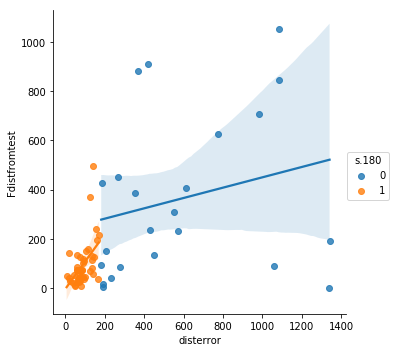

In [17]:
sns.lmplot(x="disterror", y="Fdistfromtest", hue="s.180",
               truncate=True, size=5, data=all)

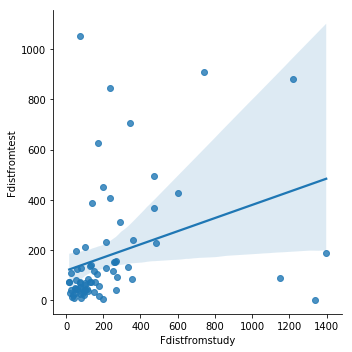

In [18]:
sns.lmplot(x="Fdistfromstudy", y="Fdistfromtest",
               truncate=True, size=5, data=all)

In [19]:
all.columns

Index(['finaltestX', 'finaltestY', 'finalrecall_refresh', 'confX',
       'Fdistfromstudy', 'fs.180', 'Fdistfromtest', 'studyX', 'studyY',
       'testX', 'testY', 'recallrefresh', 'disterror', 's.180'],
      dtype='object')

In [20]:
def calculate_angle(array, x1, y1, x2, y2, new_col):
    for lab,row in array.iterrows():
        dy=array.loc[lab, y2]-array.loc[lab, y1]
        dx=array.loc[lab, x2]-array.loc[lab, x1]
        all.loc[lab, new_col]=math.degrees(math.atan2(float(dy), float(dx)))
    return array



In [21]:
all=calculate_angle(all, 'studyX', 'studyY', 'testX', 'testY', 'test_orig_angle')
all=calculate_angle(all, 'studyX', 'studyY', 'finaltestX', 'finaltestY', 'final_orig_angle')

all=calculate_angle(all, 'finaltestX', 'finaltestY', 'studyX', 'studyX', 'orig_final_angle')
all=calculate_angle(all, 'finaltestX', 'finaltestY', 'testX', 'testY', 'test_final_angle')


In [22]:
all.columns

Index(['finaltestX', 'finaltestY', 'finalrecall_refresh', 'confX',
       'Fdistfromstudy', 'fs.180', 'Fdistfromtest', 'studyX', 'studyY',
       'testX', 'testY', 'recallrefresh', 'disterror', 's.180',
       'test_orig_angle', 'final_orig_angle', 'orig_final_angle',
       'test_final_angle'],
      dtype='object')

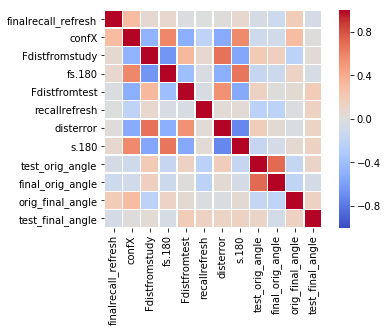

In [23]:
corr_tmp=all.copy()
corr_tmp.drop(['finaltestX', 'finaltestY', 'studyX', 'studyY', 'testX', 'testY'], axis=1, inplace=True)
sns.heatmap(corr_tmp.corr(), vmin=-1, vmax=1, center=0, cmap='coolwarm',
            square=True, linewidths=.5)